In [102]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
import numpy as np
warnings.filterwarnings('ignore')

In [103]:
h1n1 = pd.read_csv('../data/h1n1.csv', encoding='unicode_escape')

In [104]:
h1n1.head(15)

,Country,Cases,Deaths,Update Time
0,Algeria,5,0.0,7/6/2009 9:00
1,Antigua and Barbuda,2,0.0,7/6/2009 9:00
2,Argentina,2485,60.0,7/6/2009 9:00
3,Australia,5298,10.0,7/6/2009 9:00
4,Austria,19,0.0,7/6/2009 9:00
5,Bahamas,7,0.0,7/6/2009 9:00
6,Bahrain,15,0.0,7/6/2009 9:00
7,Bangladesh,18,0.0,7/6/2009 9:00
8,Barbados,12,0.0,7/6/2009 9:00
9,Belgium,54,0.0,7/6/2009 9:00


In [105]:
countries = list(h1n1['Country'].unique())
countries

['Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belgium',
 'Bermuda, UKOT',
 'Bolivia',
 'Bosnia and Hezegovina',
 'Brazil',
 'British Virgin Islands, UKOT',
 'Brunei Darussalam',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Cap Verde',
 'Cayman Islands, UKOT',
 'Chile',
 'China',
 'Colombia',
 'Cook Island',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 '\xa0\xa0\xa0\xa0\xa0French Polynesia, FOC',
 '\xa0\xa0\xa0\xa0\xa0Guadaloupe, FOC',
 '\xa0\xa0\xa0\xa0\xa0Martinique, FOC',
 '\xa0\xa0\xa0\xa0\xa0New Caledonia, FOC',
 '\xa0\xa0\xa0\xa0\xa0Saint Martin, FOC',
 'Germany',
 'Greece',
 'Guatemala\xa0',
 'Guyana',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran, Islamic Republic',
 'Iraq',
 'Ireland',
 'Israel',
 'I

Highest confirmed cases are belgium, germany and portugal. So let's look at those 

In [106]:
belgium= h1n1.loc[h1n1["Country"] == "Belgium"]
belgium = belgium.loc[belgium["Cases"] > 2]
belgium = belgium.reset_index(drop=True)


germany= h1n1.loc[h1n1["Country"] == "Germany"]
germany = germany.loc[germany["Cases"] > 2]
germany = germany.reset_index(drop=True)

portugal= h1n1.loc[h1n1["Country"] == "Portugal"]
portugal = portugal.loc[portugal["Cases"] > 2]
portugal = portugal.reset_index(drop=True)

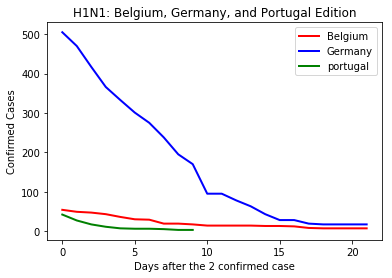

In [107]:
plt.plot(belgium.index, belgium['Cases'], 'r', linewidth = 2, label="Belgium")
plt.plot(germany.index, germany['Cases'],'b',linewidth = 2, label="Germany")
plt.plot(portugal.index, portugal['Cases'],'g',linewidth = 2, label="portugal")
plt.title("H1N1: Belgium, Germany, and Portugal Edition")
plt.xlabel("Days after the 2 confirmed case")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

In [108]:
#Order the dataframes by date

belgium = belgium.sort_values(by="Update Time")
belgium = belgium.drop('Country', axis=1)
belgium = belgium.drop('Deaths', axis=1)

X_belgium = belgium
X_belgium = X_belgium.drop("Cases", axis=1)

y_belgium = belgium
y_belgium = y_belgium.drop('Update Time', axis=1)

germany = germany.sort_values(by="Update Time")
germany = germany.drop('Country', axis=1)
germany = germany.drop('Deaths', axis=1)

X_germany = germany
X_germany = X_germany.drop("Cases", axis=1)

y_germany = germany
y_germany = y_germany.drop('Update Time', axis=1)

portugal = portugal.sort_values(by="Update Time")
portugal = portugal.drop('Country', axis=1)
portugal = portugal.drop('Deaths', axis=1)

X_portugal = portugal
X_portugal = X_portugal.drop("Cases", axis=1)

y_portugal = portugal
y_portugal = y_portugal.drop('Update Time', axis=1)

In [109]:
#Working on Belgium first

train, test = train_test_split(belgium, test_size=0.2, shuffle=False)

train = np.expand_dims(train, axis=2)

In [110]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 7
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, shuffle=False, batch_size=1)

In [111]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [112]:
lstm_model.fit_generator(generator, epochs=20)

Epoch 1/20


ValueError: Error when checking input: expected lstm_6_input to have 3 dimensions, but got array with shape (1, 7, 2, 1)